In [1]:
%matplotlib inline

# K-moyennes (notions)
Ce notebook servira de support pour introduire l'algorithme des K-moyennes (kmeans). Ici, l'objectif est de se focaliser sur le fonctionnement de l'algorithme et sur le choix du nombre de classes optimales.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn_extra.cluster import KMedoids
from scipy.spatial import distance

In [3]:
# options pour pandas
pd.set_option("display.max_columns",30)
pd.set_option('display.max_rows', 30)

In [4]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


## 1) Prise en main de l'algorithme

**On rappelle que l'algorithme des K-moyennes est un algorithmes non supervisé.**    
Le premier objectif de cette partie est une première prise en main de l'algorithme des kmeans. Pour cela, on lira entre autre la [documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).    
Il faudra ensuite de se sensibiliser à l'impact des différents paramètres sur les résultats de la classification.    
Pour situer cet algorithme relativement à une partie de l'existant, on pourra aller voir, sur le site de scikit-learn, ce [tutoriel comparant de différents algorithmes d'aggrégation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py) (mais aussi [un autre sur les K-moyennes](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py) et [un autre sur un jeu de données corrompu](https://scikit-learn-extra.readthedocs.io/en/latest/auto_examples/plot_clustering.html#sphx-glr-auto-examples-plot-clustering-py)). 

#### Chargement des données

Le fichier DATA1.txt contient **un ensemble 132 données en dimension 2**.    
Ce jeu de donnée jouet a été simulé à partir de trois gaussiennes. Le nombre de classes est donc connu.
Dans les faits, pour chacune des données on pourra donc avoir une idée de sa classe d'appartenance.
Pour résoudre le problème d'aggrégation, on pourrait déterminer les classes à la main.    
**Pour un problème réaliste, les données seront dans un espace de dimension supérieur à deux, on ne pourra pas se servir de toutes les visualisations fournies. Ces visualisations sont là pour aider à comprendre l'algorithme. Pour indiquer, un nombre "optimal" de classe on devra le justifier en se basant au minimum sur un indicateur et des explications.**    

In [ ]:
# pour charger les données, on recommande l'utilisation de pandas 
# qui est en général utilsé pour une description statistiques rapide des données 
# (ici, cela ne sera pas nécessaire)
# néanmoins l'utilisation d'autre chose reste votre prérogative
Data1=pd.read_csv('DATA1.txt',sep='\s+', header=None,
                  names=['Dim1','Dim2','Dim3'],
                  dtype={'Dim1': np.float64, 'Dim2': np.float64,'Dim3': np.float64})

In [7]:
Data1=pd.read_csv('2d_final.csv')

Text(0.5, 1.0, 'Données issues de trois gaussiennes')

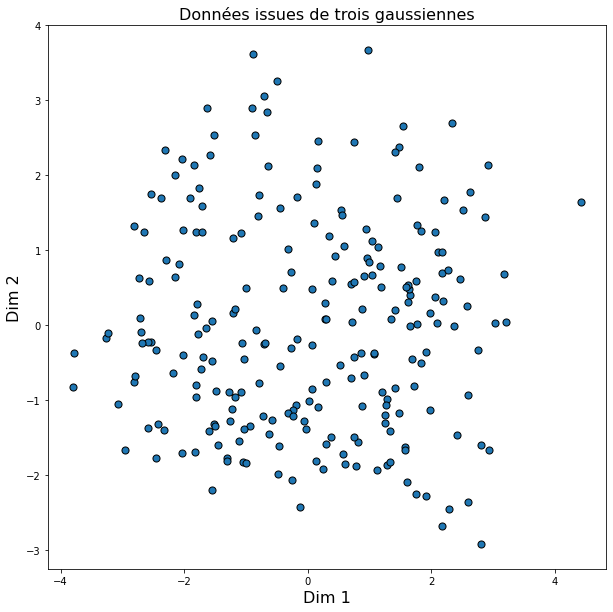

In [8]:
# affichage des points ayant servis pour adapter le modèle.
plt.figure(figsize=(10,10))
plt.scatter(Data1['Dim1'].values,Data1['Dim2'].values, edgecolor='k', s=50)
plt.xlabel('Dim 1',fontsize=16)
plt.ylabel('Dim 2',fontsize=16)
plt.title("Données issues de trois gaussiennes",
          fontsize=16)


#### Classification kmeans

Le script ci-dessous utilise les données `Data1` pour illustrer l'algorithme des k-moyennes. Il faudra exécuter ce script et ,éventuellement, le modifier pour comprendre les spécificités de l'algorithme. Une fois cette partie achevée il faudra ête capable de commenter les résultats.

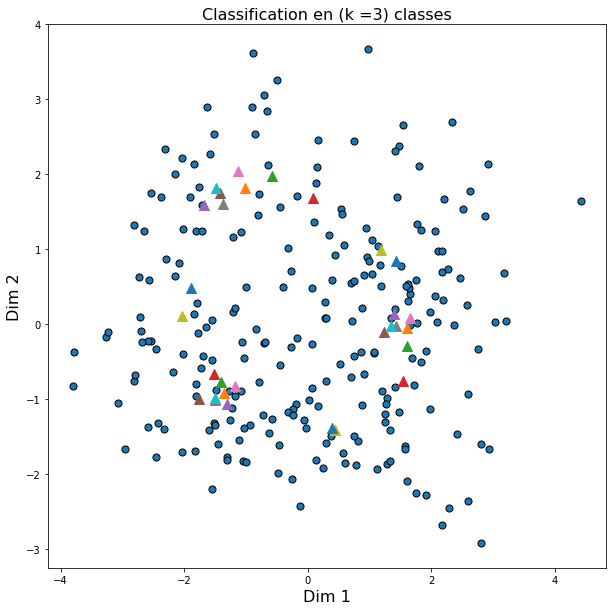

In [9]:
# préparation du jeu de données
Data = Data1[['Dim1','Dim2']].values


# affichage des points ayant servis pour adapter le modèle.
plt.figure(figsize=(10,10))
plt.scatter(Data[:, 0], Data[:, 1], edgecolor='k', s=50)
plt.xlabel('Dim 1',fontsize=16)
plt.ylabel('Dim 2',fontsize=16)
n_clusters=3
plt.title("Classification en (k ={0}) classes".format(n_clusters),
          fontsize=16)

k_means=KMeans(n_clusters=n_clusters,max_iter=1)
e=(0.2, 0.9, 0.1)
for n_iter in range(10):
    k_means.fit(Data)
    plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],
               marker='^', s=100)
    
plt.show() 

## 2) choix des paramètres de l'algorithme des K moyennes

Objectif : 
- étudier l'impact du nombre de classes sur les performance de l'algorithme.
- considérer l'effet de la distance et du système de poids lors du vote.

Le script ci-dessous compare des classification type kmeans avec plusierus valeurs de k

In [10]:
# liste_n_clusters donne le nbre de clusters considérés dans chaque expérience
liste_n_clusters=[1, 2, 3, 4, 5, 7, 10, 15, 20, Data.shape[0]//2,  Data.shape[0]]
liste_n_clusters

[1, 2, 3, 4, 5, 7, 10, 15, 20, 117, 234]

[1132.9016575196822]
[1132.9016575196822, 638.0987131755995]
[1132.9016575196822, 638.0987131755995, 436.5108021388468]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865, 177.5772232306849]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865, 177.5772232306849, 119.33781197520847]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865, 177.5772232306849, 119.33781197520847, 78.93773401268916]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865, 177.5772232306849, 119.33781197520847, 78.93773401268916, 57.8151647737482]
[1132.9016575196822, 638.0987131755995, 436.5108021388468, 297.7884936323409, 243.19389416575865, 177.5772232306849, 119

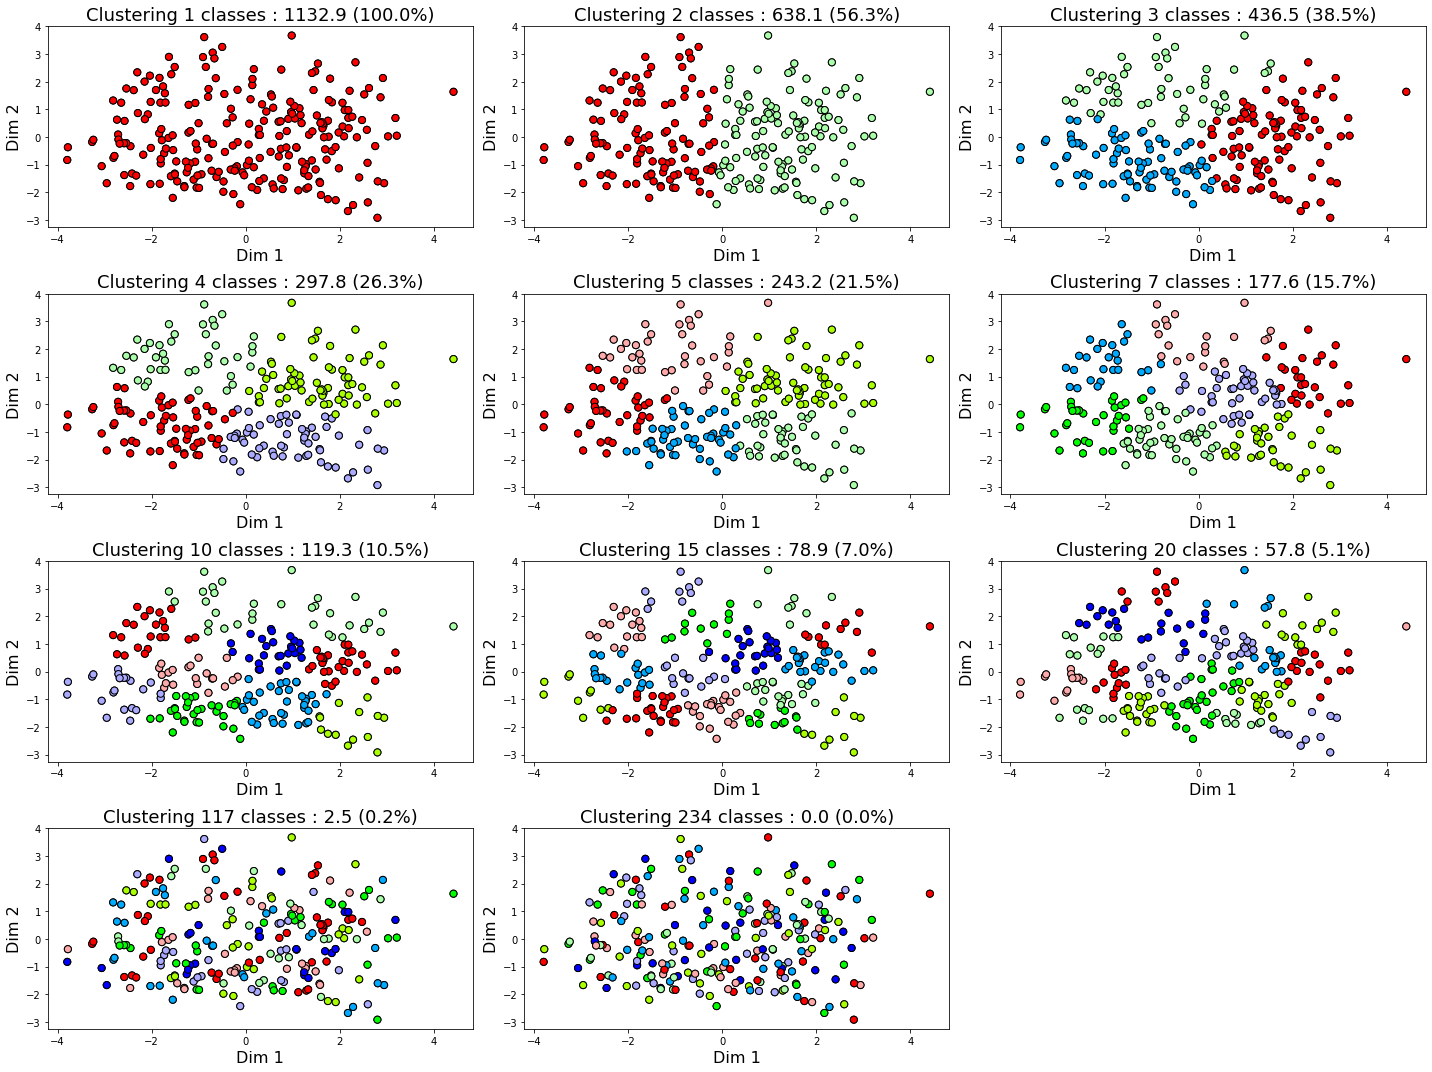

In [11]:
# a reprendre
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#AAFF00','#0000FF', 
                             '#00AAFF', '#AAAAFF','#FFAAAA', '#AAFFAA'])

inerties_intra = list()
bic_clusters = list()
silhouette_avg = list()
silhouette_sample_values = list()
agregat_label = [[]]*len(liste_n_clusters)
agregat_cardinalite = [[]]*len(liste_n_clusters)
states={}

nb_c = 3
nb_l = int(np.ceil(len(liste_n_clusters)/nb_c))
figure = plt.figure(figsize=(20, 15))
for i,n_clusters in enumerate(liste_n_clusters):
    # création du modèle de classification
    k_means=KMeans(n_clusters=n_clusters)
    k_means.fit(Data)
    #
    # calcul de l'inertie intra classes
    if n_clusters==1:
        inertie_totale= k_means.inertia_
    inertie_intra_=100 * k_means.inertia_ / inertie_totale
    inerties_intra.append(k_means.inertia_)
    print(inerties_intra)
    #
    # Calcul du BIC de la partition
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        bic_clusters.append(compute_bic(k_means,Data))

    #
    # Calcul du coefficient de silhouette 
    #  (silhouette_score gives the average value for all the samples)
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        silhouette_avg.append(silhouette_score(Data, k_means.labels_))
        silhouette_sample_values.append(silhouette_samples(Data, k_means.labels_))
    #
    # cardinalites des differents aggegats
    agregat_label[i], agregat_cardinalite[i] = np.unique(k_means.labels_, return_counts=True)
    #
    # affichage des points ayant servis pour la classification
    #  (colorés en fonction des clusters)
    ax=plt.subplot(nb_l,nb_c,i+1)
    ax.scatter(Data[:, 0], Data[:, 1], c=k_means.labels_,
               cmap=cmap_bold, edgecolor='k', s=50)
    ax.scatter(Data[:, 0], Data[:, 1], c=k_means.labels_,
               cmap=cmap_bold, edgecolor='k', s=50)
    # titres et autres 
    plt.title("Clustering {} classes : {:.1f} ({:.1f}%)".format(n_clusters,inerties_intra[-1],inertie_intra_),fontsize=18)
    plt.xlabel('Dim 1',fontsize=16)
    plt.ylabel('Dim 2',fontsize=16)
    
    states[n_clusters]=k_means.__getstate__().copy()
plt.tight_layout()

#### Cardinalités

In [12]:
tableau_cardinalite = np.zeros((len(liste_n_clusters),max(liste_n_clusters)))
for i, lesCard in enumerate(agregat_cardinalite):
    for j, card in enumerate(lesCard): 
        tableau_cardinalite[i][j] = card
#colonnes = lesLab = agregat_label[-1]
df = pd.DataFrame(tableau_cardinalite,columns= agregat_label[-1]) 
df = df.applymap("{0:.0f}".format)
#.fillna("")
df[df.eq('0')] = ''
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,234,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,
1,110,124,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,
2,100,83,51,,,,,,,,,,,,,...,,,,,,,,,,,,,,,
3,65,67,61,41,,,,,,,,,,,,...,,,,,,,,,,,,,,,
4,39,64,50,37,44,,,,,,,,,,,...,,,,,,,,,,,,,,,
5,28,35,35,26,43,21,46,,,,,,,,,...,,,,,,,,,,,,,,,
6,22,29,31,14,26,36,22,21,15,18,,,,,,...,,,,,,,,,,,,,,,
7,12,24,12,13,10,10,24,19,24,9,14,16,21,18,8,...,,,,,,,,,,,,,,,
8,15,12,8,17,12,18,13,19,12,10,13,6,12,10,17,...,,,,,,,,,,,,,,,
9,3,2,3,3,3,2,2,3,7,3,3,2,2,3,2,...,,,,,,,,,,,,,,,


#### Analyse de la variance (inertie intra)

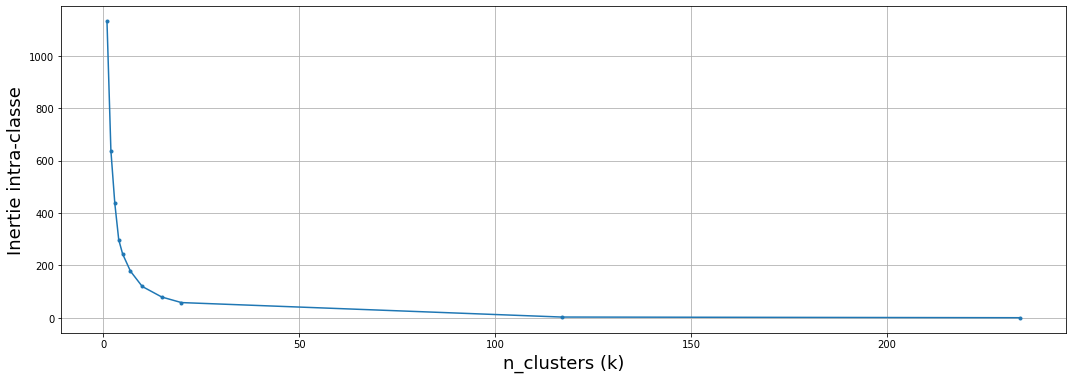

In [13]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[::-1],inerties_intra[::-1],'.-')
plt.grid()
plt.xlabel('n_clusters (k)',fontsize=18)
plt.ylabel('Inertie intra-classe',fontsize=18) ;

In [14]:
##KMeans.fit??

#### BIC pour différents nombres de centres 

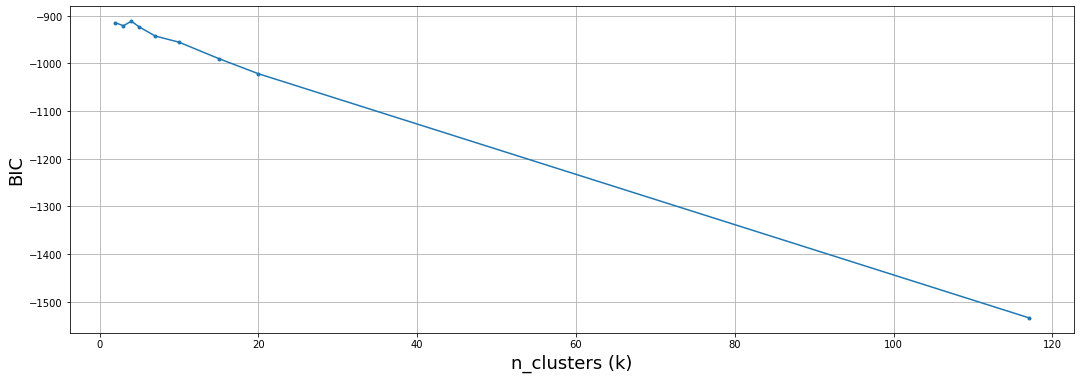

In [15]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[-2:0:-1],bic_clusters[::-1],'.-')
plt.grid()
plt.xlabel('n_clusters (k)',fontsize=18)
plt.ylabel('BIC',fontsize=18) ;

#### Coefficient de Silhouette
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

Text(0, 0.5, 'Coefficient de silhouette')

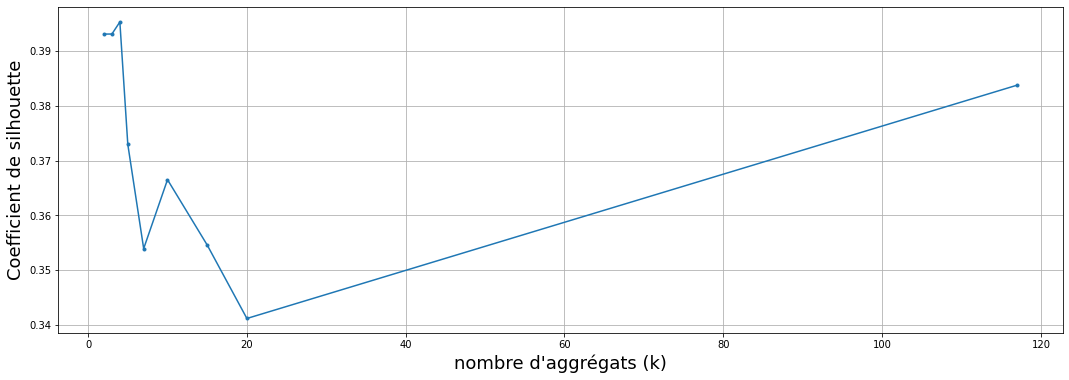

In [16]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[-2:0:-1],silhouette_avg[::-1],'.-')
plt.grid()
plt.xlabel('''nombre d'aggrégats (k)''',fontsize=18)
plt.ylabel('Coefficient de silhouette',fontsize=18)

For n_clusters = 2 The average silhouette_score is : 0.3930141847281575
For n_clusters = 3 The average silhouette_score is : 0.3962340949214276
For n_clusters = 4 The average silhouette_score is : 0.39522176692573346
For n_clusters = 5 The average silhouette_score is : 0.3729359460623864
For n_clusters = 7 The average silhouette_score is : 0.35719362979220887
For n_clusters = 10 The average silhouette_score is : 0.3623514030713791
For n_clusters = 15 The average silhouette_score is : 0.3509240329828231
For n_clusters = 20 The average silhouette_score is : 0.3592917633953978
For n_clusters = 117 The average silhouette_score is : 0.39500920181601235


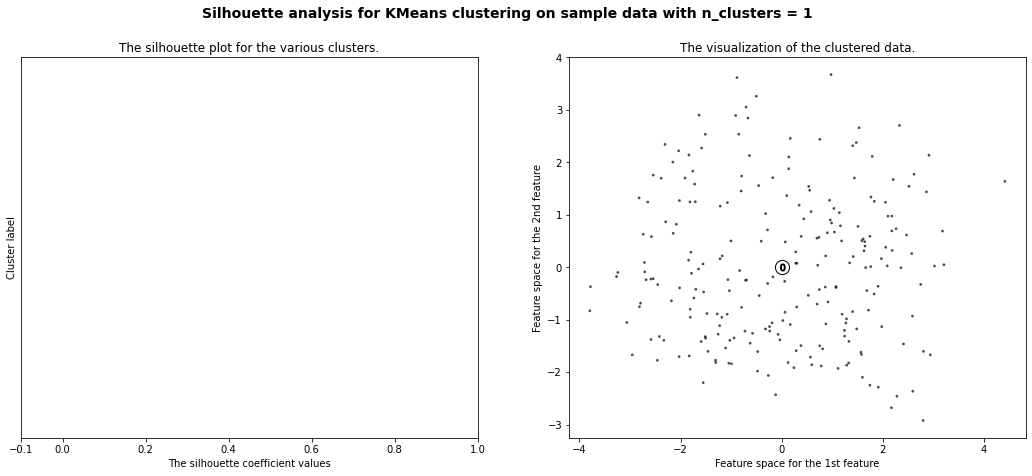

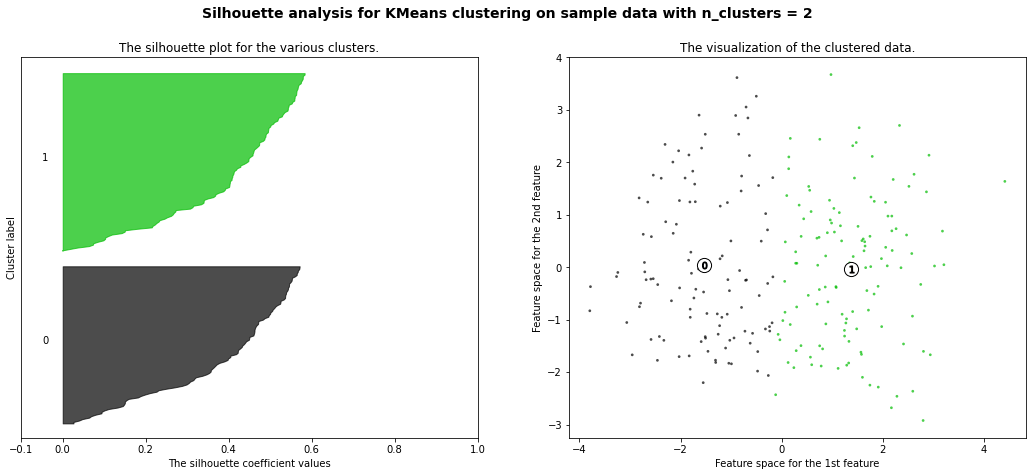

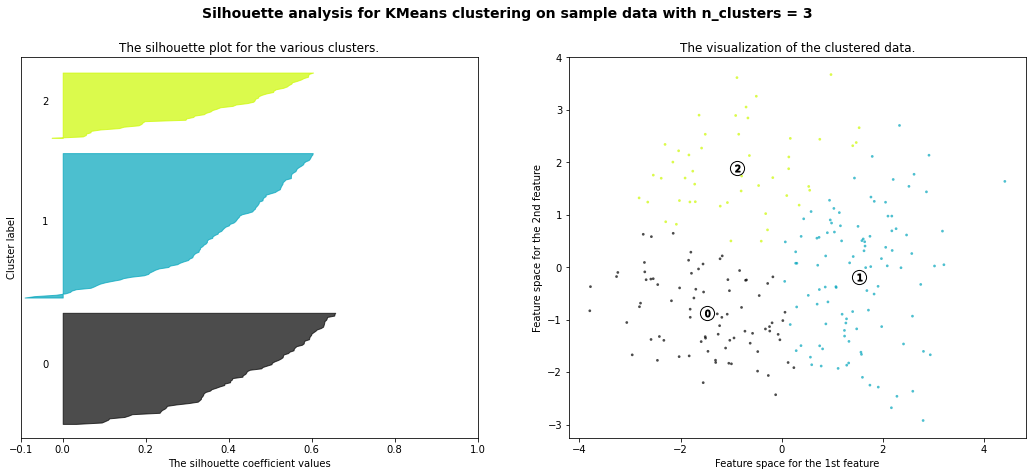

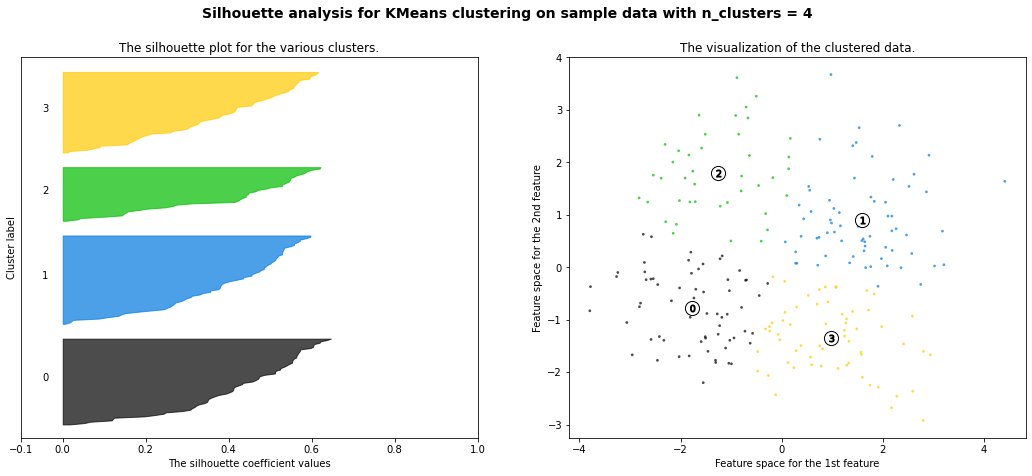

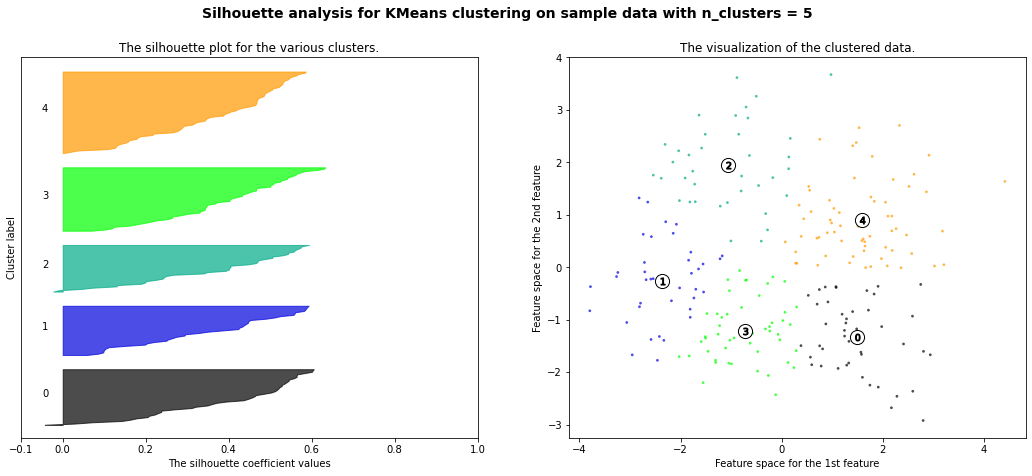

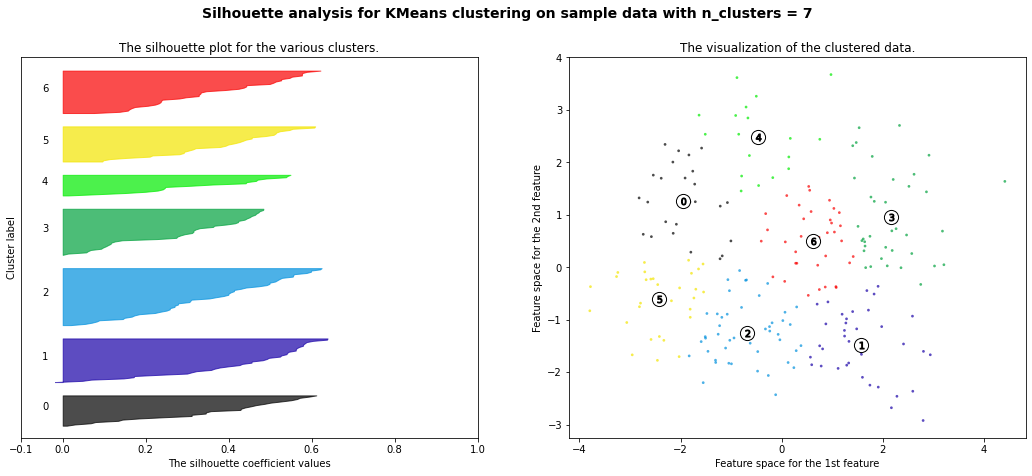

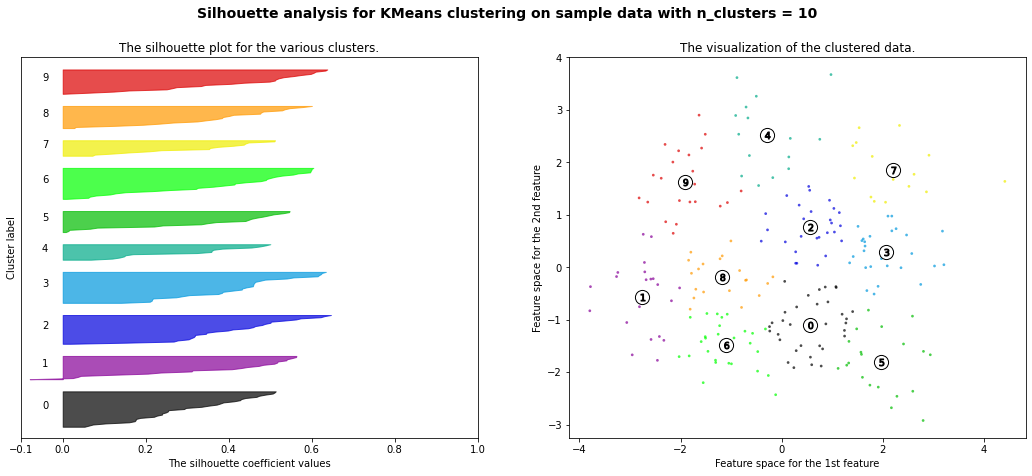

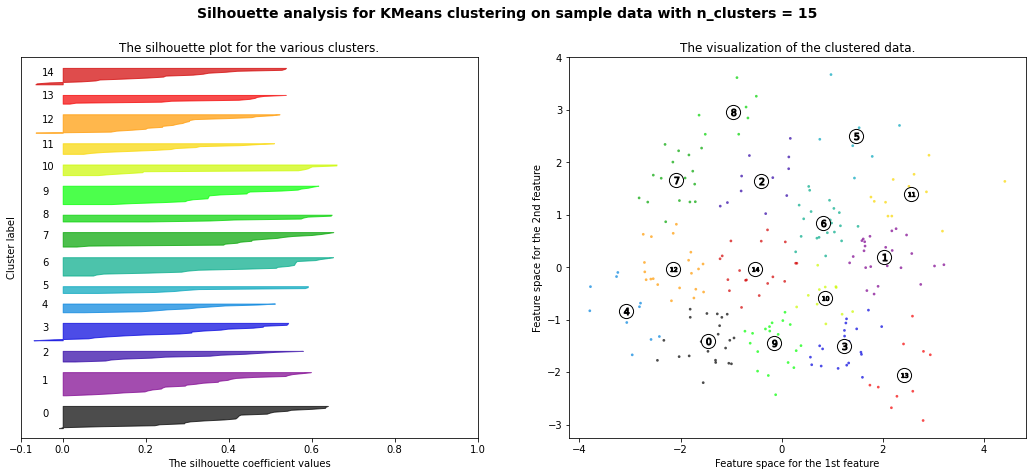

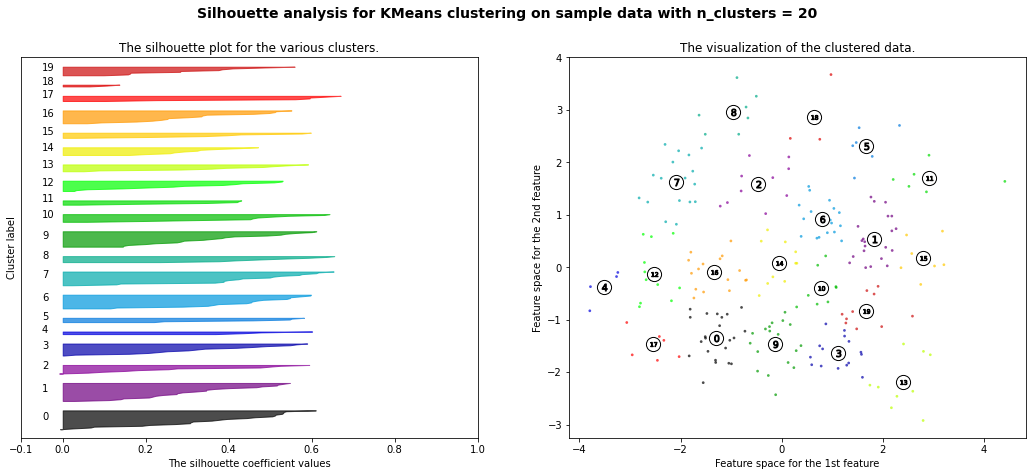

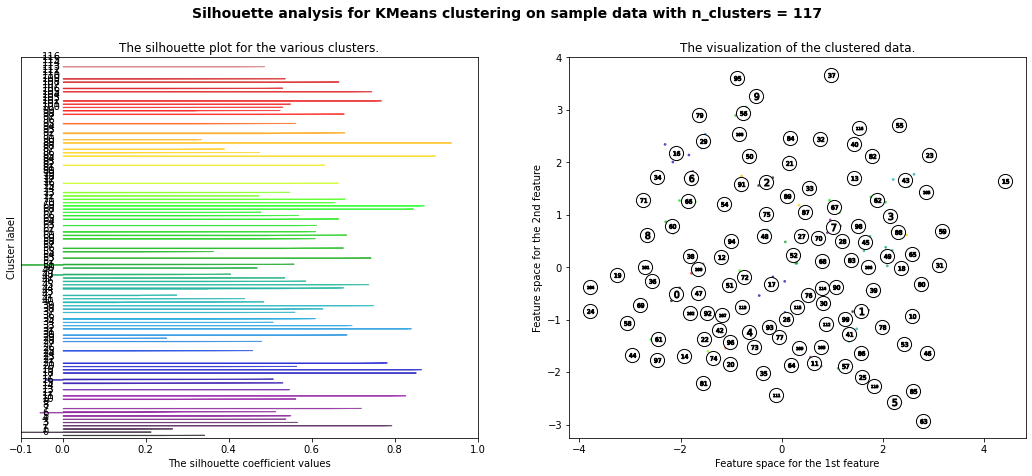

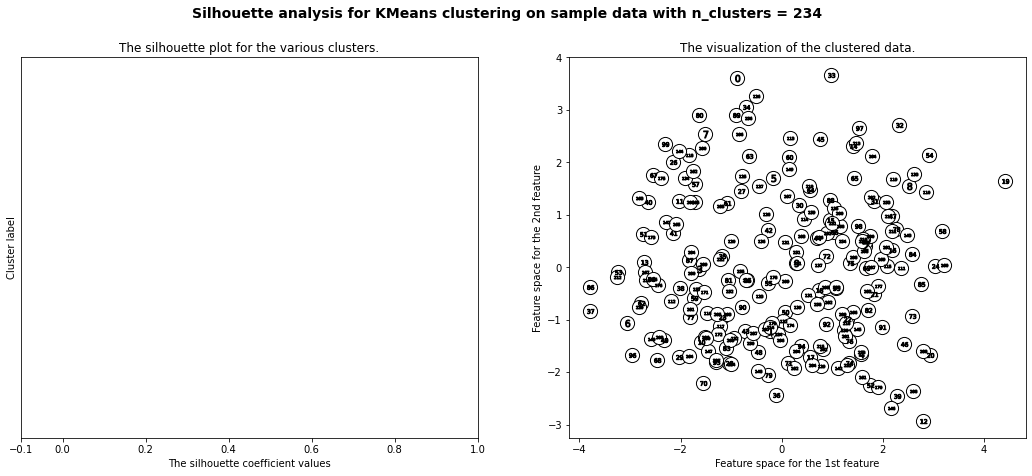

In [17]:

import matplotlib.cm as cm
for n_clusters in liste_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        silhouette_avg = silhouette_score(Data, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Data,cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    #ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Data[:, 0], Data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 3) Formes fortes 

Une forme forte identifie les observations qui sont toujours affectées au même cluster quelques soit l'essai

In [19]:
n_essais=25
n_clusters=2
Memory=np.zeros((Data.shape[0],n_essais))
for i in range(n_essais):
    k_means=KMeans(n_clusters)
    k_means.fit(Data)
    Memory[:,i]=k_means.labels_

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(Data1, x='Dim1', y='Dim2', z='Dim3',color=k_means.labels_)
fig.show()

##### Les données et les classes associées (pour différentes initialisations)

In [ ]:
#Chercher les données qui sont affecter au meme classes dans toutes les execution (aprés 20 test) 
#Cela veut dire qu'il formes des cluster a chaque execution

In [ ]:
affectation = pd.DataFrame(Memory.astype(int),index=['d'+str(i+1) for i in range(Data.shape[0])],columns=[str(i) for i in range(n_essais)])

##### Les formes fortes résultantes 

In [ ]:
#len(formes_fortes)

In [ ]:
formes_fortes, unique_counts=np.unique(Memory,axis=0, return_counts=True)

In [ ]:
pp=np.sort(-unique_counts)
tt=formes_fortes.take(np.argsort(-unique_counts), 0)[:2]

In [ ]:
nombreDeFormesFortes = formes_fortes.shape[0]
pd.DataFrame(formes_fortes.astype(int),
             index=[ 'FF {} ({:2})'.format(i+1,c) for i,c in enumerate(unique_counts)],
             columns=[str(i) for i in range(n_essais)])
#pd.DataFrame(formes_fortes,columns=[str(i) for i in range(n_essais)])

In [ ]:
unique_counts

**Représentation des formes fortes sur une figure**

In [ ]:
# à faire
forme_forte = np.ones(affectation.shape[0])*-1
for i,row in enumerate(tt.astype(int)):
    forme_forte[((affectation-row)== 0).all(axis=1)]=i
forme_forte

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(x=Data[forme_forte!=-1,0], y=Data[forme_forte!=-1,1], color=[str(z) for z in forme_forte[forme_forte!=-1]])
fig.show()

## 4) Frontières de Décision

In [ ]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(Data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = Data[:, 0].min() - 1, Data[:, 0].max() + 1
y_min, y_max = Data[:, 1].min() - 1, Data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(Data[:, 0], Data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(Data[:,0:2])
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = Data[:, 0].min() - 1, Data[:, 0].max() + 1
y_min, y_max = Data[:, 1].min() - 1, Data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(Data[:, 0], Data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.figure(figsize=(10,10))
plt.show()


***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)